In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
import scipy.stats as stats
from ClassSingles8Bytes import Singles
import os
import pickle
%matplotlib inline
FILE_PREFIX = '/home/users/eeganr/petGATEsim/analysis/'

In [34]:
COARSE_TIME = 1.6e-9
FINE_TIME = 50e-12

In [35]:
with open('coinci_real.pkl', 'rb') as f:
    real = pickle.load(f)

In [36]:
with open('coinci_sim.pkl', 'rb') as f:
    sim = pickle.load(f)

In [37]:
real['delta'] = real['time2'] - real['time1']

In [38]:
sim['delta'] = sim['time2'] - sim['time1']

In [42]:
sim.head()

,time1,time2,detector1,detector2,source1,source2,true,delta
0,0.000007,0.000007,1022,1261,"(-0.417016, 0.034954607, 0.002332096)","(-0.417016, 0.034954607, 0.002332096)",True,7.590016e-10
1,0.000008,0.000008,1038,605,"(-0.12840076, 0.31193334, -7.373484)","(-0.12840076, 0.31193334, -7.373484)",True,-5.413415e-10
2,0.000022,0.000022,1515,1226,"(0.0016525849, -0.00038588708, 4.380497)","(0.0016525849, -0.00038588708, 4.380497)",True,-1.175950e-09
3,0.000025,0.000025,606,1805,"(0.18810642, -0.24268946, 0.83859056)","(0.18810642, -0.24268946, 0.83859056)",True,1.025172e-09
4,0.000028,0.000028,713,137,"(0.33893502, -0.3412142, -16.173983)","(0.33893502, -0.3412142, -16.173983)",True,1.187439e-09


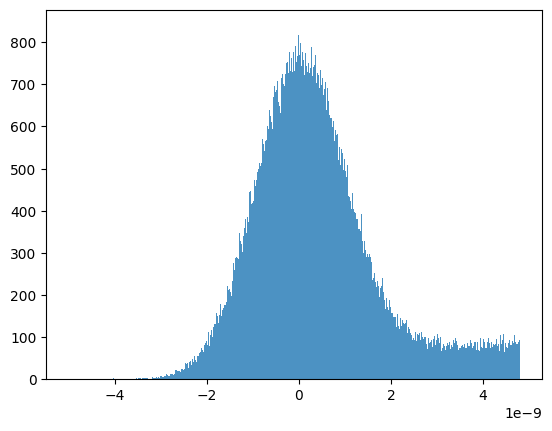

In [ ]:
bins = np.arange(-4.8e-9, 4.8e-9, 0.012e-9)
plt.hist(sim['delta'], bins=bins, alpha = 0.8)
plt.show()

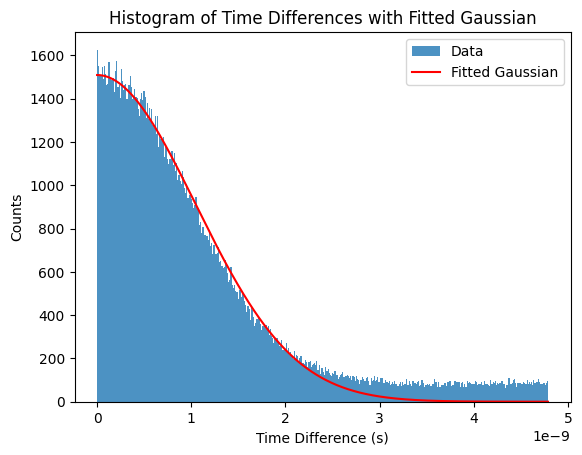

In [24]:
# fit a gaussian to the histogram
def gaussian(x, a, sigma):
    return a * np.exp(-((x) ** 2) / (2 * sigma ** 2))

# Fit the histogram data
hist, bin_edges = np.histogram(sim['delta'], bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[max(hist), np.std(sim['delta'])])
# Plot the histogram and the fitted Gaussian
plt.hist(sim['delta'], bins=bins, alpha=0.8, label='Data')
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
plt.plot(x_fit, gaussian(x_fit, *popt), color='red', label='Fitted Gaussian')
plt.xlabel('Time Difference (s)')
plt.ylabel('Counts')
plt.title('Histogram of Time Differences with Fitted Gaussian')
plt.legend()
plt.show()

In [31]:
# Width at Half-Maximum (WHM)
popt[1]*2.355

np.float64(2.456584248377454e-09)

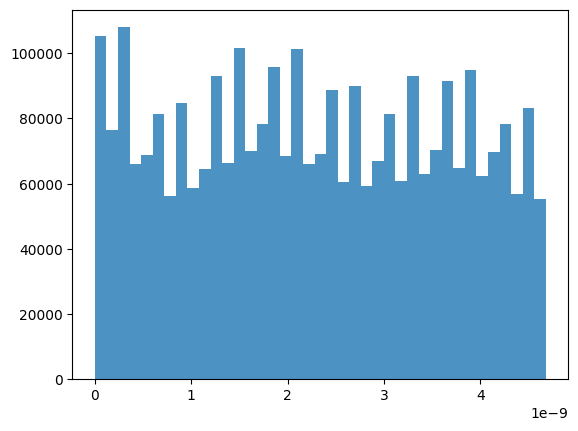

In [ ]:
bins = np.arange(0, 4.8e-9, 0.12e-9)
plt.hist(real['delta'], bins=bins, alpha = 0.8)
plt.show()